In [1]:
import pandas as pd
import numpy as np

from glob import glob
from experiments_to_run import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

paths = glob("../results/predictions*.pickle")

df = []
for path in paths:
    tmp_df = pd.read_pickle(path)
    df.append(tmp_df)
df = pd.concat(df)

2024-08-08 14:15:22.018489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-08 14:15:22.131813: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-08 14:15:22.131834: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-08-08 14:15:22.727847: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

figure exported to ../results/trends_with_margins_▸ Ensemble_CS_Conf3.[png/pdf]
figure exported to ../figures_and_tables/figure_comparison_real_predicted_data_▸ Ensemble_CS_Conf3.png


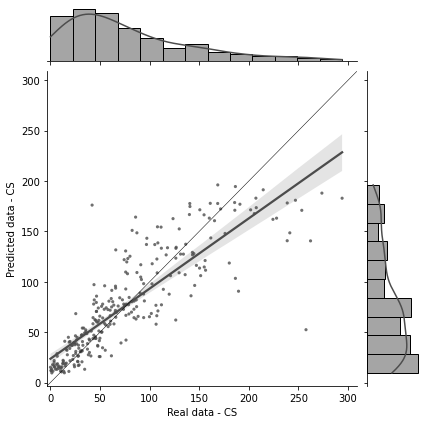

figure exported to ../results/trends_with_margins_▸ Ensemble_CSE_Conf3.[png/pdf]
figure exported to ../figures_and_tables/figure_comparison_real_predicted_data_▸ Ensemble_CSE_Conf3.png


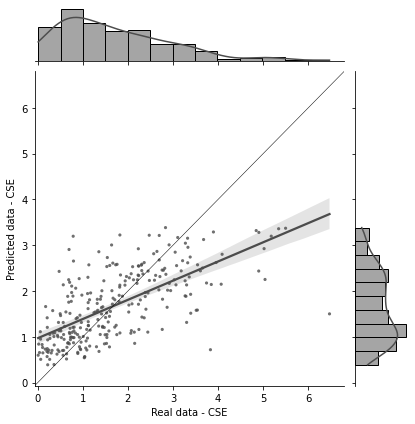

In [2]:
MODEL = "▸ Ensemble"
CONF = "Conf3"
for TARGET in TARGETS:
        
    data = df[
        (df.model==MODEL) &\
        (df.config==CONF) &\
        (df.target==TARGET)
    ]

    test = np.concatenate(data.y_test.values.tolist())
    pred = np.concatenate(data.y_pred.values.tolist())

    data_df = pd.DataFrame({"test":test, "pred":pred})

    axs = sns.jointplot(
        data=data_df,
        x='test',
        y='pred',
        color=".3",
        kind="reg",
        joint_kws=dict(scatter_kws=dict(s=10,ec=None,)),
    )
    
    ax = axs.ax_joint

    ax.set(
        xlabel='Real data - '+TARGET,
        ylabel='Predicted data - '+TARGET,
    )

    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    maxval = max(xlims[1], ylims[1])

    ax.plot([-maxval/100,maxval], [-maxval/100,maxval], color="k", lw=.5)

    ax.set_xlim((-maxval/100, maxval))
    ax.set_ylim((-maxval/100, maxval))
    
    ax.set_xlabel("Real data - "+TARGET)
    ax.set_ylabel("Predicted data - "+TARGET)
    
    plt.savefig(f"../results/trends_with_margins_{MODEL}_{TARGET}_{CONF}.png", facecolor='white', bbox_inches='tight', dpi=300)
    plt.savefig(f"../results/trends_with_margins_{MODEL}_{TARGET}_{CONF}.pdf", bbox_inches='tight', dpi=300)
    print("figure exported to", f"../results/trends_with_margins_{MODEL}_{TARGET}_{CONF}.[png/pdf]")
    
    plt.savefig(f"../figures_and_tables/figure_comparison_real_predicted_data_{MODEL}_{TARGET}_{CONF}.png", facecolor='white', bbox_inches='tight', dpi=300)
    print("figure exported to", f"../figures_and_tables/figure_comparison_real_predicted_data_{MODEL}_{TARGET}_{CONF}.png")

    plt.show()